In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import sklearn as s
from sklearn import datasets,linear_model
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from matplotlib import pyplot as plt

df=pd.read_csv('E:\Project_Data/Data.csv',sep=',',header=0)
df = df[df.test_time >= 0] #removing data with negative testtime
df.describe()

,age,test_time,motor_UPDRS,total_UPDRS,Jitter(Absolute),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Jitter(Percent)
count,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000,5863.000000
mean,64.814771,93.061538,21.289655,29.014090,0.000044,0.002988,0.003278,0.008965,0.034038,0.311012,0.017157,0.020149,0.027489,0.051470,0.032126,21.679527,0.541423,0.653252,0.219618,0.006156
std,8.827750,53.320896,8.133419,10.709966,0.000036,0.003126,0.003734,0.009378,0.025836,0.230310,0.013237,0.016672,0.020002,0.039710,0.059735,4.292521,0.101024,0.070955,0.091494,0.005628
min,36.000000,0.395830,5.037700,7.000000,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,0.000830
25%,58.000000,47.335500,15.000000,21.362000,0.000022,0.001580,0.001825,0.004730,0.019110,0.175000,0.009280,0.010790,0.015660,0.027830,0.010953,19.404000,0.469695,0.596100,0.156385,0.003580
50%,65.000000,91.754000,20.871000,27.522000,0.000035,0.002250,0.002490,0.006750,0.027530,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.917000,0.542250,0.643550,0.205560,0.004900
75%,72.000000,138.460000,27.594000,36.400500,0.000053,0.003290,0.003470,0.009880,0.039775,0.365000,0.020605,0.023775,0.032725,0.061805,0.031464,24.445500,0.614045,0.711480,0.264590,0.006800
max,85.000000,215.490000,39.511000,54.992000,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,0.099990


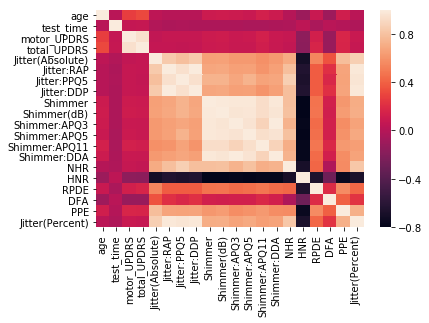

In [3]:
sns.heatmap(df.corr())

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.drop(["motor_UPDRS","total_UPDRS", "Jitter(Percent)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP", "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:DDA"], axis=1)
X.head()


,age,test_time,Jitter(Absolute),Shimmer:APQ11,NHR,HNR,RPDE,DFA,PPE
0,72,5.6431,0.000034,0.01662,0.014290,21.640,0.41888,0.54842,0.16006
1,72,12.6660,0.000017,0.01689,0.011112,27.183,0.43493,0.56477,0.10810
2,72,19.6810,0.000025,0.01458,0.020220,23.047,0.46222,0.54405,0.21014
3,72,25.6470,0.000027,0.01963,0.027837,24.445,0.48730,0.57794,0.33277
4,72,33.6420,0.000020,0.01819,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
#Select target 
Y = df["total_UPDRS"]
Y.head()
type(Y)

pandas.core.series.Series

In [7]:
# Converts target and features to numpy arrays for sklearn API
target_y = Y.as_matrix()
features_x = X.as_matrix()
type(target_y)

C:\Users\Namrata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Namrata\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


numpy.ndarray

In [8]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(features_x, target_y, test_size=0.18, random_state=0)

# Scale features
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [23]:
lm = linear_model.LinearRegression() #LinearRegression apply
model = lm.fit(X_train, Y_train) #actual "learning" happens here
predictions = lm.predict(X_test)
predictions[0:5]

array([30.02862046, 36.64752998, 18.19006808, 26.05842221, 23.71446015])

In [24]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split,cross_val_score
lm1=linear_model.LinearRegression()  #LinearRegression
s_lm=model_selection.cross_val_score(lm1,X_train,Y_train,scoring="r2",cv=5)
s_lm.mean()

0.15220514184292405

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt #LinearRegressionRMSE

rms1 = sqrt(mean_squared_error(Y_test, predictions))
print(rms1)


9.757927832519483


In [15]:
from sklearn import metrics #LinearRegressionMAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, predictions)

8.104121972878216

In [16]:
from sklearn.metrics import r2_score #0 or 1: No fit or Perfect Fit
r2_score(Y_test, predictions) #Linear RegressionR2score

0.1579038563445887

In [17]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, predictions) #linearRegressionEVS

0.15792879767656265

In [18]:
type(predictions)

numpy.ndarray

In [19]:
X_train_df=pd.DataFrame(X_train)
#print(X_train_df)
#print(type(X_train))-------array
#print(type(X_train_df))-------dataframe

Y_train_df=pd.DataFrame(Y_train)
X_test_df=pd.DataFrame(X_test)
Y_test_df=pd.DataFrame(Y_test)
Y_pred_df_linear=pd.DataFrame(predictions)


train_df_linear = pd.concat([X_train_df, Y_train_df],axis=1, sort=False)
train_df_linear.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS']

test_df_linear = pd.concat([X_test_df, Y_test_df,Y_pred_df_linear],axis=1, sort=False)
test_df_linear.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS','total_UPDRS_predicted']


print(test_df_linear.head())
print(type(test_df_linear))
print(test_df_linear.describe())
print(test_df_linear.info())


    age  test_time  Jitter(Absolute)  Shimmer:APQ11       NHR     HNR  \
0  68.0     63.609          0.000019        0.01614  0.012422  24.780   
1  74.0    107.730          0.000031        0.03394  0.030855  20.005   
2  36.0    136.440          0.000023        0.01208  0.009166  23.847   
3  60.0    186.810          0.000036        0.03140  0.016208  18.773   
4  59.0     79.504          0.000013        0.01367  0.007416  24.784   

      RPDE      DFA      PPE  total_UPDRS  total_UPDRS_predicted  
0  0.58515  0.63430  0.20613       42.401              30.028620  
1  0.68154  0.68260  0.38069       26.353              36.647530  
2  0.48602  0.67357  0.12468       11.495              18.190068  
3  0.46210  0.76891  0.19408       19.974              26.058422  
4  0.43119  0.66646  0.11805       26.490              23.714460  
<class 'pandas.core.frame.DataFrame'>
               age    test_time  Jitter(Absolute)  Shimmer:APQ11          NHR  \
count  1056.000000  1056.000000       10

Text(0.5, 0.98, 'Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value')

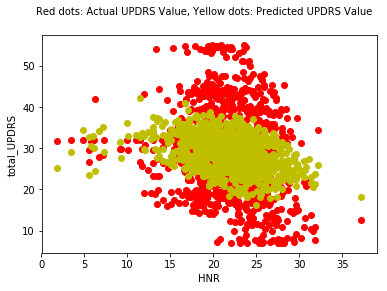

In [20]:
fig = plt.figure()

plt.plot(test_df_linear['HNR'], test_df_linear['total_UPDRS'],'ro' , label='Train Data')
plt.plot(test_df_linear['HNR'], test_df_linear['total_UPDRS_predicted'],'yo', label='Test Data' )
plt.xlabel('HNR')
plt.ylabel('total_UPDRS')
fig.suptitle('Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value', fontsize=10)

Coefficients: 
 [ 3.02626081e-01  1.68354285e-02 -2.22543616e+04 -3.50741323e+00
 -2.11411530e+01 -3.58430471e-01  8.35227081e+00 -2.95494146e+01
  2.11731109e+01]
Variance score: 0.1579038563445887


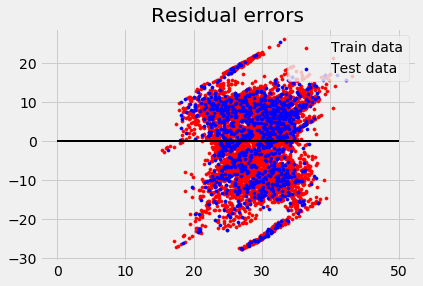

In [21]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 

# load the boston dataset 
#boston = datasets.load_boston(return_X_y=False) 

# defining feature matrix(X) and response vector(y) 
#X = boston.data 
#y = boston.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
#													random_state=1) 
'''lm = linear_model.LinearRegression() #LinearRegression apply
model = lm.fit(X_train, Y_train) #actual "learning" happens here
predictions = lm.predict(X_test)
'''
# create linear regression object 
#reg = linear_model.LinearRegression() 

# train the model using the training sets 
#reg.fit(X_train, y_train) 

# regression coefficients 
print('Coefficients: \n', lm.coef_) 

# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(lm.score(X_test, Y_test))) 

# plot for residual error 

## setting plot style 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, color = "red", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 


In [22]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor #DecisionTreeRegression

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)
predictions1 = regressor.predict(X_test)
predictions1[0:5]

array([42.401, 33.503, 11.496, 19.974, 26.49 ])

In [23]:
from sklearn import tree #DecisionTreeRegression
tr1=tree.DecisionTreeRegressor()
s_tr=model_selection.cross_val_score(tr1,X_train,Y_train,scoring="r2",cv=5)
s_tr.mean()

0.8746543811360172

In [24]:
from sklearn.metrics import mean_squared_error #DecisionTreeRMSE
from math import sqrt

rms2 = sqrt(mean_squared_error(Y_test, predictions1))
print(rms2)


3.1939128346437964


In [25]:
from sklearn import metrics #DecisionTreeRegressionMAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, predictions1)

0.9334752209595963

In [26]:
from sklearn.metrics import r2_score #DecisionTreeR2
r2_score(Y_test, predictions1)

0.9097821248834737

In [27]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, predictions1) #DecisionTreeEVS

0.9099661158007657

In [28]:
Y_pred_df_decisiontree=pd.DataFrame(predictions1)


train_df_decisiontree = pd.concat([X_train_df, Y_train_df],axis=1, sort=False)
train_df_decisiontree.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS']

test_df_decisiontree = pd.concat([X_test_df, Y_test_df,Y_pred_df_decisiontree],axis=1, sort=False)
test_df_decisiontree.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS','total_UPDRS_predicted']


print(test_df_decisiontree.head())
print(type(test_df_decisiontree))
print(test_df_decisiontree.describe())
print(test_df_decisiontree.info())


    age  test_time  Jitter(Absolute)  Shimmer:APQ11       NHR     HNR  \
0  68.0     63.609          0.000019        0.01614  0.012422  24.780   
1  74.0    107.730          0.000031        0.03394  0.030855  20.005   
2  36.0    136.440          0.000023        0.01208  0.009166  23.847   
3  60.0    186.810          0.000036        0.03140  0.016208  18.773   
4  59.0     79.504          0.000013        0.01367  0.007416  24.784   

      RPDE      DFA      PPE  total_UPDRS  total_UPDRS_predicted  
0  0.58515  0.63430  0.20613       42.401                 42.401  
1  0.68154  0.68260  0.38069       26.353                 33.503  
2  0.48602  0.67357  0.12468       11.495                 11.496  
3  0.46210  0.76891  0.19408       19.974                 19.974  
4  0.43119  0.66646  0.11805       26.490                 26.490  
<class 'pandas.core.frame.DataFrame'>
               age    test_time  Jitter(Absolute)  Shimmer:APQ11          NHR  \
count  1056.000000  1056.000000       10

Text(0.5, 0.98, 'Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value')

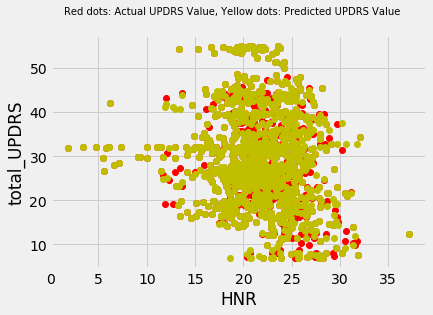

In [29]:
fig = plt.figure()
plt.plot(test_df_decisiontree['HNR'], test_df_decisiontree['total_UPDRS'],'ro' )
plt.plot(test_df_decisiontree['HNR'], test_df_decisiontree['total_UPDRS_predicted'],'yo' )
plt.xlabel('HNR')
plt.ylabel('total_UPDRS')
fig.suptitle('Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value', fontsize=10)

Variance score: 0.9097821248834737


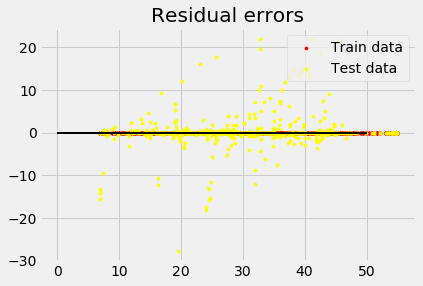

In [30]:
#print('Coefficients: \n', regressor.coef_)
print('Variance score: {}'.format(regressor.score(X_test, Y_test)))
plt.style.use('fivethirtyeight')
## plotting residual errors in training data 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - Y_train, color = "red", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - Y_test, color = "yellow", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 



In [37]:
from sklearn.ensemble import RandomForestRegressor #RandomForestRegression

regressor1 = RandomForestRegressor(n_estimators=800, random_state=1)  
regressor1.fit(X_train, Y_train)  
predictions2= regressor1.predict(X_test)
predictions2[0:5]


array([41.38646125, 29.95463875, 12.05914524, 19.91422528, 26.55201975])

In [38]:
from sklearn import ensemble
rnf1=ensemble.RandomForestRegressor()
s_rnf=model_selection.cross_val_score(rnf1,X_train,Y_train,scoring="r2",cv=5)
s_rnf.mean()

C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.9336343049072576

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt #RandomForestRMSE

rms3 = sqrt(mean_squared_error(Y_test, predictions2))
print(rms3)


2.26632628543212


In [40]:
from sklearn import metrics #RandomForestRegressionMAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, predictions2)

1.0357832539271992

In [41]:
from sklearn.metrics import r2_score #RandomForestR2Score
r2_score(Y_test, predictions2)

0.9545753754309079

In [42]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, predictions2) #Random Forest EVS

0.9546079943057417

In [37]:
Y_pred_df_randomforest=pd.DataFrame(predictions2)


train_df_randomforest = pd.concat([X_train_df, Y_train_df],axis=1, sort=False)
train_df_randomforest.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS']

test_df_randomforest = pd.concat([X_test_df, Y_test_df,Y_pred_df_randomforest],axis=1, sort=False)
test_df_randomforest.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS','total_UPDRS_predicted']


print(test_df_randomforest.head())
print(type(test_df_randomforest))
print(test_df_randomforest.describe())
print(test_df_randomforest.info())


    age  test_time  Jitter(Absolute)  Shimmer:APQ11       NHR     HNR  \
0  68.0     63.609          0.000019        0.01614  0.012422  24.780   
1  74.0    107.730          0.000031        0.03394  0.030855  20.005   
2  36.0    136.440          0.000023        0.01208  0.009166  23.847   
3  60.0    186.810          0.000036        0.03140  0.016208  18.773   
4  59.0     79.504          0.000013        0.01367  0.007416  24.784   

      RPDE      DFA      PPE  total_UPDRS  total_UPDRS_predicted  
0  0.58515  0.63430  0.20613       42.401              41.249193  
1  0.68154  0.68260  0.38069       26.353              30.116480  
2  0.48602  0.67357  0.12468       11.495              11.864757  
3  0.46210  0.76891  0.19408       19.974              19.886267  
4  0.43119  0.66646  0.11805       26.490              26.540581  
<class 'pandas.core.frame.DataFrame'>
               age    test_time  Jitter(Absolute)  Shimmer:APQ11          NHR  \
count  1056.000000  1056.000000       10

Text(0.5, 0.98, 'Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value')

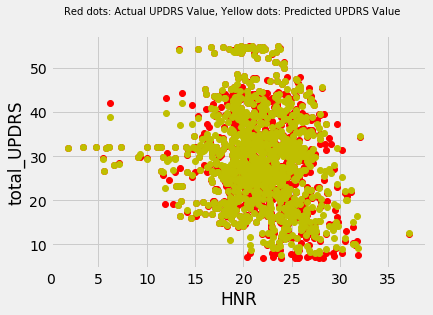

In [38]:
fig = plt.figure()
plt.plot(test_df_randomforest['HNR'], test_df_randomforest['total_UPDRS'],'ro' )
plt.plot(test_df_randomforest['HNR'], test_df_randomforest['total_UPDRS_predicted'],'yo' )
plt.xlabel('HNR')
plt.ylabel('total_UPDRS')
fig.suptitle('Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value', fontsize=10)

Variance score: 0.9538757887652384


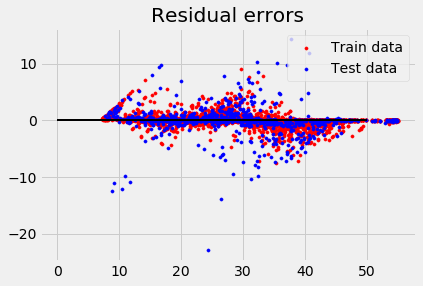

In [39]:
#print('Coefficients: \n', regressor.coef_)
print('Variance score: {}'.format(regressor1.score(X_test, Y_test)))
plt.style.use('fivethirtyeight')
## plotting residual errors in training data 
plt.scatter(regressor1.predict(X_train), regressor1.predict(X_train) - Y_train, color = "red", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(regressor1.predict(X_test), regressor1.predict(X_test) - Y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 



In [40]:
from sklearn.preprocessing import PolynomialFeatures #PolynomialRegression
from sklearn.linear_model import LinearRegression
# PolynomialFeatures (prepreprocessing)
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(X_, Y_train)

# Obtain coefficients
lg.coef_
# Predict
predictions3=lg.predict(X_test_)
predictions3[0:5]


array([31.32175827, 43.45185089, 21.92698288, 25.39307404, 25.03594971])

In [41]:
from sklearn.metrics import mean_squared_error #PolynomialRMSE
from math import sqrt

rms4 = sqrt(mean_squared_error(Y_test, predictions3))
print(rms4)


9.131731902907882


In [42]:
from sklearn import metrics #PolynomialRegressionMAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, predictions3)

7.537255593155369

In [43]:
from sklearn.metrics import r2_score #PolynomialRegressionR2Score
r2_score(Y_test, predictions3)

0.26251569855341317

In [44]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, predictions3) #Polynomial EVS

0.26251616748935125

In [45]:
from sklearn.neighbors import KNeighborsRegressor #KNeighboursRegression
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train) 
KNeighborsRegressor(...)
predictions4=(neigh.predict(X_test))
predictions4[0:5]

array([33.389 , 26.353 , 11.496 , 19.974 , 28.4735])

In [46]:
from sklearn import neighbors #KNeighborsRegression
knn1=neighbors.KNeighborsRegressor()
s_knn=model_selection.cross_val_score(knn1,X_train,Y_train,scoring="r2",cv=5)
s_knn.mean()

0.4167642613927594

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt #KNNRMSE

rms5 = sqrt(mean_squared_error(Y_test, predictions4))
print(rms5)


6.30702370106705


In [48]:
from sklearn import metrics #KNNMAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, predictions4)

3.1918665246212123

In [49]:
from sklearn.metrics import r2_score #KNNR2Score
r2_score(Y_test, predictions4)

0.6482003517480912

In [50]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, predictions4) #KNN EVS

0.6482052498250046

In [51]:
Y_pred_df_neigh=pd.DataFrame(predictions4)


train_df_neigh = pd.concat([X_train_df, Y_train_df],axis=1, sort=False)
train_df_neigh.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS']

test_df_neigh = pd.concat([X_test_df, Y_test_df,Y_pred_df_neigh],axis=1, sort=False)
test_df_neigh.columns=['age','test_time','Jitter(Absolute)','Shimmer:APQ11','NHR','HNR','RPDE','DFA','PPE','total_UPDRS','total_UPDRS_predicted']


print(test_df_neigh.head())
print(type(test_df_neigh))
print(test_df_neigh.describe())
print(test_df_neigh.info())


    age  test_time  Jitter(Absolute)  Shimmer:APQ11       NHR     HNR  \
0  68.0     63.609          0.000019        0.01614  0.012422  24.780   
1  74.0    107.730          0.000031        0.03394  0.030855  20.005   
2  36.0    136.440          0.000023        0.01208  0.009166  23.847   
3  60.0    186.810          0.000036        0.03140  0.016208  18.773   
4  59.0     79.504          0.000013        0.01367  0.007416  24.784   

      RPDE      DFA      PPE  total_UPDRS  total_UPDRS_predicted  
0  0.58515  0.63430  0.20613       42.401                33.3890  
1  0.68154  0.68260  0.38069       26.353                26.3530  
2  0.48602  0.67357  0.12468       11.495                11.4960  
3  0.46210  0.76891  0.19408       19.974                19.9740  
4  0.43119  0.66646  0.11805       26.490                28.4735  
<class 'pandas.core.frame.DataFrame'>
               age    test_time  Jitter(Absolute)  Shimmer:APQ11          NHR  \
count  1056.000000  1056.000000       10

Text(0.5, 0.98, 'Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value')

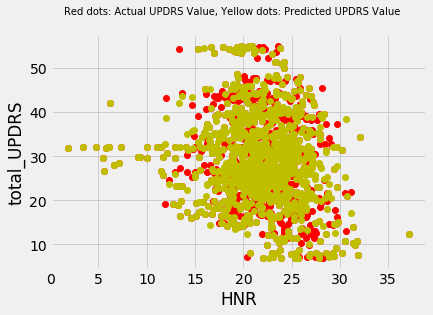

In [52]:
fig = plt.figure()
plt.plot(test_df_neigh['HNR'], test_df_neigh['total_UPDRS'],'ro' )
plt.plot(test_df_neigh['HNR'], test_df_neigh['total_UPDRS_predicted'],'yo' )
plt.xlabel('HNR')
plt.ylabel('total_UPDRS')
fig.suptitle('Red dots: Actual UPDRS Value, Yellow dots: Predicted UPDRS Value', fontsize=10)

Variance score: 0.6482003517480912


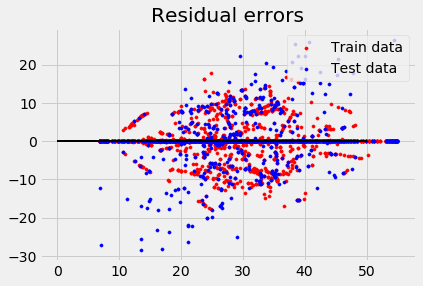

In [53]:
#print('Coefficients: \n', regressor.coef_)
print('Variance score: {}'.format(neigh.score(X_test, Y_test)))
plt.style.use('fivethirtyeight')
## plotting residual errors in training data 
plt.scatter(neigh.predict(X_train), neigh.predict(X_train) - Y_train, color = "red", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(neigh.predict(X_test), neigh.predict(X_test) - Y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 



In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, expon

# Hyperparameter optimization: 
# Use randomized search for drastically faster param tuning. 
# TODO: Compare with kernel ridge regression and other algos

params = {'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ['linear', 'rbf']}

svr = SVR()

n_iter_search = 200
clf = RandomizedSearchCV(svr, param_distributions=params,
                                   n_iter=n_iter_search)

clf.fit(X_train_minmax, Y_train)

clf.best_estimator_

y_pred = clf.predict(X_test_minmax)

C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [16]:
from sklearn.metrics import mean_squared_error #SVMMAE
from math import sqrt
mae=mean_squared_error(Y_test, y_pred)

rms6 = sqrt(mean_squared_error(Y_test, y_pred))
print(rms6)
print(mae)


9.411350322544179
88.57351489365242


In [11]:
from sklearn.metrics import r2_score #SVM R2Score
r2_score(Y_test, y_pred)

0.2166599089842215

In [12]:
from sklearn.metrics import explained_variance_score #The best possible score is 1.0, lower values are worse.
explained_variance_score(Y_test, y_pred) #SVM EVS

0.23054001343627561

Variance score: -5.69191035368195


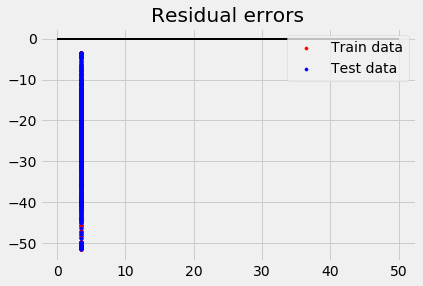

In [13]:
#print('Coefficients: \n', regressor.coef_)
print('Variance score: {}'.format(clf.score(X_test, Y_test)))
plt.style.use('fivethirtyeight')
## plotting residual errors in training data 
plt.scatter(clf.predict(X_train), clf.predict(X_train) - Y_train, color = "red", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(clf.predict(X_test), clf.predict(X_test) - Y_test, color = "blue", s = 10, label = 'Test data') 

## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual errors") 

## function to show plot 
plt.show() 



In [ ]:
labels = df.iloc[:, 0].values
features = df.iloc[:, 1:].values
print(features.shape)
print(labels[0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scled_features = scaler.fit_transform(features)


In [ ]:
X.info()

In [ ]:
plt.plot(df["NHR"],df["HNR"],"ro")